In [3]:
# Get environment variable
from __future__ import print_function
import os
import numpy as np
import pandas as pd

dfdata = os.getenv("DFDATA")

print (dfdata)

/gws/open/NYCOpenData/nycopendata/data


## Department of Buildings Applications

This data is the NYC Department of Building's Job Application Filings. It is a list of all applications to work on buildings throughout New York, with information about the owner, what kind of work is being done, who is doing the work, and other related information.

The DOB charges a fee for an job application. I thought it might be interesting to compare the fee to the proposed height of the building and see if there is some sort of correlation or trend.

In [21]:
# Import CSV
data = pd.read_csv('/gws/open/NYCOpenData/nycopendata/data/ic3t-wcy2/1473437392/ic3t-wcy2.csv')

print (data.columns)

Index([u'Job #', u'Doc #', u'Borough', u'House #', u'Street Name', u'Block',
       u'Lot', u'Bin #', u'Job Type', u'Job Status', u'Job Status Descrp',
       u'Latest Action Date', u'Building Type', u'Community - Board',
       u'Cluster', u'Landmarked', u'Adult Estab', u'Loft Board', u'City Owned',
       u'Little e', u'PC Filed', u'eFiling Filed', u'Plumbing', u'Mechanical',
       u'Boiler', u'Fuel Burning', u'Fuel Storage', u'Standpipe', u'Sprinkler',
       u'Fire Alarm', u'Equipment', u'Fire Suppression', u'Curb Cut', u'Other',
       u'Other Description', u'Applicant's First Name',
       u'Applicant's Last Name', u'Applicant Professional Title',
       u'Applicant License #', u'Professional Cert', u'Pre- Filing Date',
       u'Paid', u'Fully Paid', u'Assigned', u'Approved', u'Fully Permitted',
       u'Initial Cost', u'Total Est. Fee', u'Fee Status',
       u'Existing Zoning Sqft', u'Proposed Zoning Sqft', u'Horizontal Enlrgmt',
       u'Vertical Enlrgmt', u'Enlargement SQ Foo

In [11]:
# Show me ALL THE COLUMNS
pd.set_option('max_columns', 100)

# Print top 3 rows
print (data.head(3))

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             

                        Street Name  Block   Lot      Bin # Job Type  \
0  PARK AVENUE SOUTH                   857  38.0  1016890.0       A2   
1  KNOX PLACE                          342   1.0  5161350.0       A3   
2  WEST 131 STREET                    1729   9.0  1053831.0       A2   

  Job Status                         Job Status Descrp Latest Action Date  \
0          D  APPLICATION PROCESSED - ENTIRE                   04/25/2013   
1          A  PRE-FILING                                       04/25/2013   
2          Q  PERMIT ISSUED - PARTIAL JOB                      04/25/2013   

  Building Type Community - Board Cluster Landmarked Adult Estab Loft Board  \
0         OTHER               105     NaN        NaN         NaN        NaN   
1  1-2-3 FAMILY               501  

In [34]:
# Remove all but two numerical columns and rename them

num_df = data[['Proposed Height', 'Total Est. Fee']]
num_df.rename(columns={'Proposed Height': 'height', 'Total Est. Fee': 'fee'}, inplace=True)

print (num_df)

        height        fee
0          0.0    $986.00
1          0.0   $1144.00
2         54.0    $522.50
3        120.0    $225.00
4         64.0    $389.50
5       1250.0  $31762.40
6         36.0    $316.50
7        300.0   $1727.60
8        398.0    $160.00
9         16.0    $265.00
10        60.0    $440.10
11        28.0    $419.50
12        15.0    $764.90
13        12.0    $316.50
14        15.0    $280.00
15         0.0    $472.00
16        75.0   $1181.70
17        52.0    $265.00
18        24.0    $295.90
19        25.0    $207.25
20       101.0    $225.00
21       520.0    $160.00
22        26.0   $1063.60
23        60.0    $934.50
24       180.0    $440.00
25        33.0    $326.80
26         0.0    $378.30
27       546.0    $635.80
28       200.0   $5466.50
29        15.0    $347.40
...        ...        ...
246232    53.0    $160.00
246233   140.0   $4745.50
246234    60.0    $286.50
246235    24.0    $285.60
246236    88.0    $160.00
246237    26.0    $145.45
246238    27

In [46]:
# Convert dollar sign fee column into float
num_df["fee"] = pd.to_numeric(num_df["fee"].replace('[\$,)]','', regex=True))

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
# Drop all observations with a building height of 0
num_df.drop(num_df.query('height == 0.0').index.values, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
num_df.head(3)

,height,fee
2,54.0,522.5
3,120.0,225.0
4,64.0,389.5


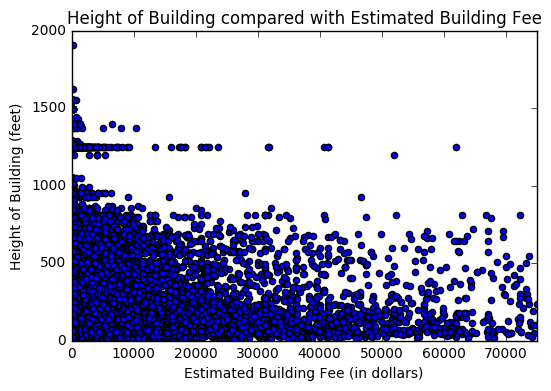

In [76]:
# Plot the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(num_df['fee'], num_df['height'])

plt.axis([0.0, 75000.0, 0.0, 2000.0])

plt.title("Height of Building compared with Estimated Building Fee")

plt.ylabel('Height of Building (feet)')
plt.xlabel('Estimated Building Fee (in dollars)')

plt.show()

The above plot visually explores if there is any correlation between the height of a building and the Estimated Building Fee issued by the Department of Buildings. Interestingly (or perhaps simply curiously), there does not seem to be a strong correlation between building height and fee. 

## Extra Credit Attempt

In [4]:
# Isolate the date/time column with another numerical column

df = pd.read_csv("/gws/open/NYCOpenData/nycopendata/data/ic3t-wcy2/1473437392/ic3t-wcy2.csv")

date_zip = df[["DOBRunDate", "Zip"]]
print (date_zip.head(3))

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,14,16,19,38,59,60,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


               DOBRunDate    Zip
0  04/26/2013 12:00:00 AM  10222
1  04/26/2013 12:00:00 AM  10314
2  04/26/2013 12:00:00 AM  10016


In [6]:
# Convert DOBRunDate to correct datetime

date_zip.loc[:, "date"] = pd.to_datetime(df["DOBRunDate"], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
date_zip.loc[:, "zip_code"] = date_zip["Zip"].values.astype('int')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
# Drop rows with NaN

drop_rows = date_zip[np.isnan(date_zip['zip_code'])].index.values
date_zip.drop(drop_rows, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
drop_rows = date_zip.query('20100101 > date').index.values
date_zip.drop(drop_rows, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
drop_rows = date_zip.query('zip_code == 0').index.values
date_zip.drop(drop_rows, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
# date_zip[date_zip["zip_code"] < 1000]

date_zip["date"].values

array(['2013-04-26T00:00:00.000000000', '2013-04-26T00:00:00.000000000',
       '2013-04-26T00:00:00.000000000', ...,
       '2016-09-10T00:00:00.000000000', '2016-09-10T00:00:00.000000000',
       '2016-09-10T00:00:00.000000000'], dtype='datetime64[ns]')

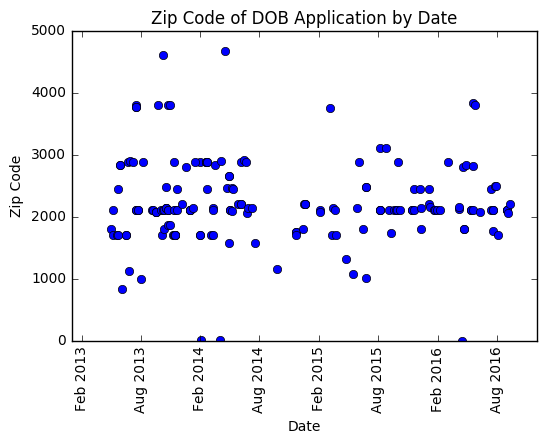

In [40]:
# Plot date

## Note: it appears that pylab use is discouraged by the matplotlib community
## http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related

import matplotlib.pyplot as plt

plt.plot_date(date_zip['date'], date_zip['zip_code'])

plt.xticks(rotation=90)
plt.axis(['20130101', '20161201', 0, 5000])

plt.title("Zip Code of DOB Application by Date")

plt.xlabel('Date')
plt.ylabel('Zip Code')

plt.show()

There does not appear to be a particularly strong correlation between the zip code of a DOB building application and the date.